In [12]:
import numpy as np
import matplotlib.pyplot as plt
import GenerateData
import importlib
import torch
importlib.reload(GenerateData)

<module 'GenerateData' from '/home/rns/work/Grad/Computational/Deconvolver/GenerateData.py'>

In [13]:
phi = np.linspace(0, 1, 1024)

In [14]:
pulses, locs = GenerateData.generate_dummy(10000, 1024)
np.savez('DummyData.npz', *[pulses, locs], **{'pulses' : pulses, 'locs' : locs})

In [15]:
def lorentzian(phi, gamma, x0 = 0.5):
    return (gamma/((phi - x0)**2 + gamma**2))/np.pi

In [16]:
def plot_comps(locs, gammas, amps):
    for i in range(len(locs)):
        if amps[i] >= 0.1:
            subpulse = lorentzian(phi, gammas[i], locs[i])
            subpulse *= amps[i]/max(subpulse)
            plt.plot(phi, subpulse)

In [6]:
import DummyModel
importlib.reload(DummyModel)
importlib.reload(GenerateData)

<module 'GenerateData' from '/home/rns/work/Grad/Computational/Deconvolver/GenerateData.py'>

In [17]:
model = DummyModel.runModel()

MSE: 0.05
RMSE: 0.23


In [8]:
test_pulses, test_locs = GenerateData.generate_dummy(10, 1024)

In [9]:
y_preds = []
with torch.no_grad():
    for i in range(10):
        X_sample = test_pulses[i]
        X_sample = torch.tensor(X_sample, dtype=torch.float32)
        y_pred = model(X_sample).item()
        y_preds.append(y_pred)
        print(y_pred)

0.5298521518707275
0.4739162027835846
0.5014506578445435
0.4965570867061615
0.5188651084899902
0.49671003222465515
0.5095468759536743
0.5145782232284546
0.5197392702102661
0.5189976692199707


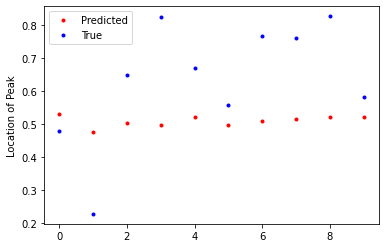

In [10]:
plt.plot(y_preds, 'r.', label = 'Predicted')
plt.plot(test_locs, 'b.', label = 'True')
plt.ylabel('Location of Peak')
plt.legend()

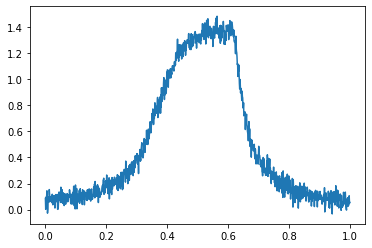

In [11]:
pulse, locs, gammas, amps = GenerateData.generate(1, 1024)
plt.plot(phi, pulse[0])